# Extracción de características

## 1. Importar librerias

In [44]:
#Instalamos la librería para análisis de variables categóricas
%pip install funpymodeling

Note: you may need to restart the kernel to use updated packages.


In [45]:
#Importamos las librerias pandas, numpy, y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

## 2. Cargar archivo


In [46]:
data = pd.read_excel("./Recursos/microretailer_mit_lift_lab.xlsx")

# columnas elegidas
columnasElegidas = [1, 3, 9, 10, 11, 12, 13, 14, 16, 21, 22, 25, 26, 31, 34, 47, 48, 54, 55, 83]

# Extraccion de las columnas elegidas
dataOk = data.iloc[:, columnasElegidas]
dataOk

,_title,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,20_reviews_finances_monthly,49_inventory_records,145_number_direct_competitors,186_internet_connection,214_customer_relationship_tools,33_credit_to_customers,227_agreement_ecommerce_platforms,60_services,277_payment_method_suppliers
0,"November 12, 2022",Salomon Abdala Perez,Tailor,yes,no,no,2,0.0,4,2.0,2.0,yes,Software especializado + computadora,3.0,yes,Redes sociales,no,no,NaN,NaN
1,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,0,4.0,8,1.0,1.0,yes,No lo hago,4.0,yes,Aplicación móvil,no,no,NaN,Transferencia interbancaria
2,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,0,0.0,24,2.0,2.0,yes,En Excel,0.0,yes,Redes sociales,yes,no,NaN,NaN
3,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,0,0.0,2,1.0,1.0,yes,Software especializado + computadora,4.0,yes,Teléfono,no,no,NaN,NaN
4,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,0,0.0,16,0.0,0.0,yes,En papel,0.0,yes,NaN,yes,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),yes,no,no,1,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),no,no,no,1,5.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,"November 3, 2022",Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,3,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,"November 3, 2022",Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Limpieza de los datos 

- 3.1 Seccionar columnas (cuantitativas y cualitativas)

In [47]:
dataCualitativo  = dataOk.iloc[: , [0,1,2,3,4,5,11,12,14,15,16,17,18,19]]
dataCuantitativo = dataOk.iloc[: , [6,7,8,9,10,13]]

print(f'Columnas cualitativas: {dataCualitativo.columns}')
print(f'\n\nColumnas cuantitativas: {dataCuantitativo.columns}')

Columnas cualitativas: Index(['_title', '_updated_by', '232_type_of_store',
       '108_does_the_micro_retailer_has_a_barred_window_',
       '99_does_the_micro_retailer_exhibits_products_outside_',
       '102_does_the_micro_retailer_sells_fresh_products_',
       '20_reviews_finances_monthly', '49_inventory_records',
       '186_internet_connection', '214_customer_relationship_tools',
       '33_credit_to_customers', '227_agreement_ecommerce_platforms',
       '60_services', '277_payment_method_suppliers'],
      dtype='object')


Columnas cuantitativas: Index(['97_number_of_customers_in_store', '268_number_fridges',
       '104_how_many_shelves_does_the_micro_retailer_have',
       '2_current_permanent_employees',
       '4_number_permanent_employees_last_year',
       '145_number_direct_competitors'],
      dtype='object')


- 3.2 Detectar datos nulos

In [48]:
valoresNulos = dataCuantitativo.isnull().sum()
valoresNulos

97_number_of_customers_in_store                       0
268_number_fridges                                    3
104_how_many_shelves_does_the_micro_retailer_have     0
2_current_permanent_employees                        60
4_number_permanent_employees_last_year               76
145_number_direct_competitors                        68
dtype: int64

- 3.3 Tratar los valores nulos/atipicos en el DF

En este caso se llenaron los valores nulos con el valor de 0, ya que esta las columnas representan la cantidad de inventario de tal establecimiento. Por tanto, se puede intuir que si no cuenta con registro del mismo, es porque no cuenta con dicho inventario.

In [49]:
data2 = dataCuantitativo.copy()
data2 = data2.fillna(0)

- 3.4 Verificamos los valores nulos

In [50]:
valoresNulos = data2.isnull().sum()
valoresNulos

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
145_number_direct_competitors                        0
dtype: int64

- 3.5 Uso del diagrama boxplot


<Figure size 1500x800 with 0 Axes>

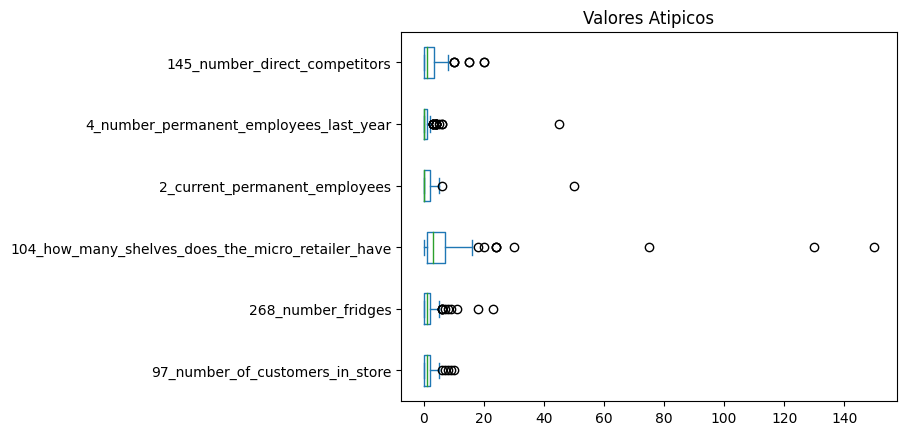

In [51]:
fig = plt.figure(figsize = (15, 8))
data2.plot(kind='box', vert=False)
plt.title('Valores Atipicos')
plt.show()

- 3.6 Metodo Cuantiles

In [52]:
# Encontramos los valores extremos
y = data2

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25

limiteSuperiorIQR = percentile75 + 1.5 * iqr
limiteInferiorIQR = percentile25 - 1.5 * iqr


print(f"Limite superior permitido :")
for col, val in limiteSuperiorIQR.items():
    print(f"{col}: {round(val, 2)}")

print(f"\n\nLimite inferior permitido :")
for col, val in limiteInferiorIQR.items():
    print(f"{col}: {round(val, 2)}")

Limite superior permitido :
97_number_of_customers_in_store: 5.0
268_number_fridges: 5.0
104_how_many_shelves_does_the_micro_retailer_have: 16.0
2_current_permanent_employees: 5.0
4_number_permanent_employees_last_year: 2.5
145_number_direct_competitors: 8.75


Limite inferior permitido :
97_number_of_customers_in_store: -3.0
268_number_fridges: -3.0
104_how_many_shelves_does_the_micro_retailer_have: -8.0
2_current_permanent_employees: -3.0
4_number_permanent_employees_last_year: -1.5
145_number_direct_competitors: -5.25


- 3.7 Encontrar los Outliers

In [53]:
# Encontramos Outliers
outliers = data2[(y>limiteSuperiorIQR) | (y<limiteInferiorIQR)]
print(f"\nOutliers:\n")
for col, val in outliers.items():
    print(f"{col}: {round(val, 2)}")


Outliers:

97_number_of_customers_in_store: 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
Name: 97_number_of_customers_in_store, Length: 171, dtype: float64
268_number_fridges: 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
Name: 268_number_fridges, Length: 171, dtype: float64
104_how_many_shelves_does_the_micro_retailer_have: 0       NaN
1       NaN
2      24.0
3       NaN
4       NaN
       ... 
166     NaN
167     NaN
168     NaN
169     NaN
170     NaN
Name: 104_how_many_shelves_does_the_micro_retailer_have, Length: 171, dtype: float64
2_current_permanent_employees: 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
Name: 2_current_permanent_employees, Length: 171, dtype: float64
4_number_permanent_employees_last_year: 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN


- 3.8 Convertir los Outliers en valores nulos

In [54]:
data3_iqr = data2[(y<=limiteSuperiorIQR) & (y>=limiteInferiorIQR)]
data3_iqr

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors
0,2.0,0.0,4.0,2.0,2.0,3.0
1,0.0,4.0,8.0,1.0,1.0,4.0
2,0.0,0.0,NaN,2.0,2.0,0.0
3,0.0,0.0,2.0,1.0,1.0,4.0
4,0.0,0.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0
167,1.0,5.0,5.0,0.0,0.0,0.0
168,3.0,1.0,1.0,0.0,0.0,0.0
169,0.0,1.0,1.0,0.0,0.0,0.0


- 3.9 Verificamos valores nulos

In [55]:
# Corroboramos valores nulos
valores_nulos = data3_iqr.isnull().sum()
print(valores_nulos)

97_number_of_customers_in_store                       5
268_number_fridges                                   10
104_how_many_shelves_does_the_micro_retailer_have     9
2_current_permanent_employees                         2
4_number_permanent_employees_last_year               18
145_number_direct_competitors                         7
dtype: int64


- 3.10 Sustituimos los nulos por el mean de cada columna

In [56]:
# Reemplazamos los outliers con el mean de cada col
data4_iqr = data3_iqr.copy()
data4_iqr = data3_iqr.fillna(round(data3_iqr.mean(), 1))
display(data4_iqr)

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors
0,2.0,0.0,4.0,2.0,2.0,3.0
1,0.0,4.0,8.0,1.0,1.0,4.0
2,0.0,0.0,4.0,2.0,2.0,0.0
3,0.0,0.0,2.0,1.0,1.0,4.0
4,0.0,0.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0
167,1.0,5.0,5.0,0.0,0.0,0.0
168,3.0,1.0,1.0,0.0,0.0,0.0
169,0.0,1.0,1.0,0.0,0.0,0.0


- 3.11 Verificamos valores nulos

In [57]:
# Corroboramos valores nulos
valores_nulos = data4_iqr.isnull().sum()
print(valores_nulos)

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
145_number_direct_competitors                        0
dtype: int64


- 3.12 Grafica boxplot

<Figure size 1900x1200 with 0 Axes>

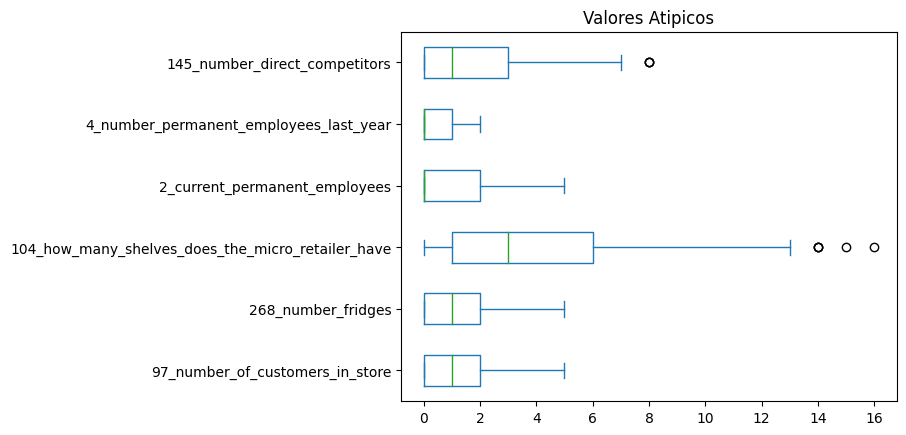

In [58]:
# Graficamos la grafica de boxplot, encontramos nuevos outliers, pero son distintos a los originales
fig = plt.figure(figsize = (19, 12))
data4_iqr.plot(kind='box', vert=False)
plt.title('Valores Atipicos')
plt.show()

- 3.13. Juntamos las columnas cuantitativas con las cualitativas

In [59]:
dataLimpio = pd.concat([dataCualitativo, data4_iqr], axis=1)
display(dataLimpio)

,_title,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,20_reviews_finances_monthly,49_inventory_records,186_internet_connection,214_customer_relationship_tools,33_credit_to_customers,227_agreement_ecommerce_platforms,60_services,277_payment_method_suppliers,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors
0,"November 12, 2022",Salomon Abdala Perez,Tailor,yes,no,no,yes,Software especializado + computadora,yes,Redes sociales,no,no,NaN,NaN,2.0,0.0,4.0,2.0,2.0,3.0
1,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,yes,No lo hago,yes,Aplicación móvil,no,no,NaN,Transferencia interbancaria,0.0,4.0,8.0,1.0,1.0,4.0
2,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,yes,En Excel,yes,Redes sociales,yes,no,NaN,NaN,0.0,0.0,4.0,2.0,2.0,0.0
3,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,yes,Software especializado + computadora,yes,Teléfono,no,no,NaN,NaN,0.0,0.0,2.0,1.0,1.0,4.0
4,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,yes,En papel,yes,NaN,yes,no,NaN,NaN,0.0,0.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),yes,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,5.0,0.0,0.0,0.0
167,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,5.0,0.0,0.0,0.0
168,"November 3, 2022",Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,0.0,0.0,0.0
169,"November 3, 2022",Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0


## 4. Extraccion de caracteristicas

- 4.1 Columna _title

<Axes: ylabel='frequency'>

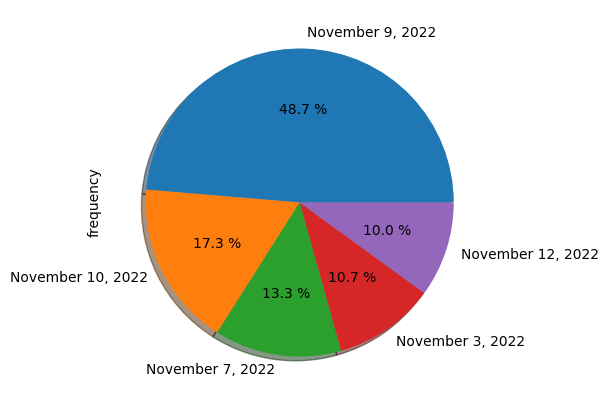

In [60]:
table2 = freq_tbl(dataLimpio['_title'])
Filtro = table2[table2['frequency']>10]
Filtro_setter = Filtro.set_index("_title")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.2 Columna _updated_by

Text(0, 0.5, 'Frecuencia')

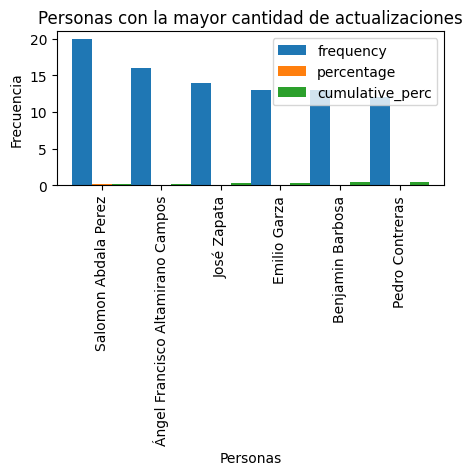

In [61]:
table1 = freq_tbl(dataLimpio['_updated_by'])
Filtro = table1[table1['frequency']>9]
Filtro_setter = Filtro.set_index("_updated_by")
Filtro_setter
Filtro_setter.plot(kind = "bar" , width=1, figsize=(5,2))
plt.title('Personas con la mayor cantidad de actualizaciones')
plt.xlabel('Personas')
plt.ylabel('Frecuencia')

- 4.3 Columna 232_type_of_store

<Axes: ylabel='frequency'>

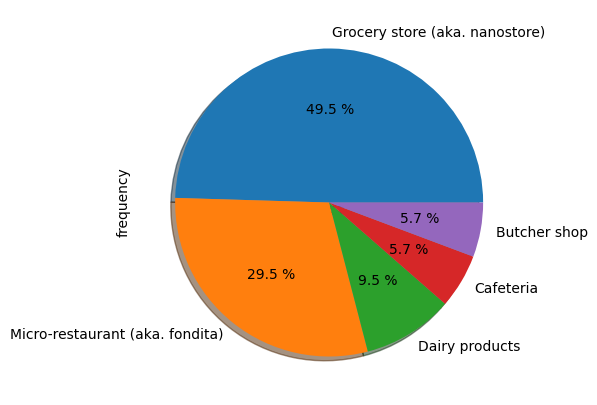

In [62]:
table3 = freq_tbl(dataLimpio['232_type_of_store'])
Filtro = table3[table3['frequency']>5]
Filtro_setter = Filtro.set_index("232_type_of_store")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.4 Columna 108_does_the_micro_retailer_has_a_barred_window_

<Axes: ylabel='frequency'>

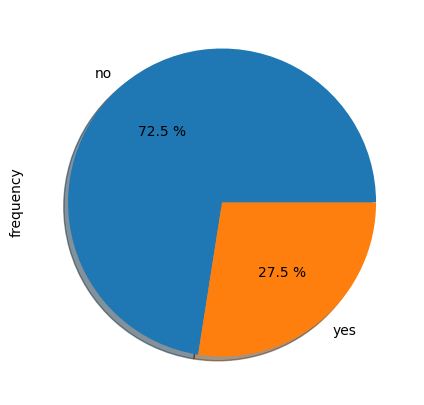

In [63]:
table4 = freq_tbl(dataLimpio['108_does_the_micro_retailer_has_a_barred_window_'])
Filtro = table4[table4['frequency']>5]
Filtro_setter = Filtro.set_index("108_does_the_micro_retailer_has_a_barred_window_")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.5 Columna 99_does_the_micro_retailer_exhibits_products_outside_

<Axes: ylabel='frequency'>

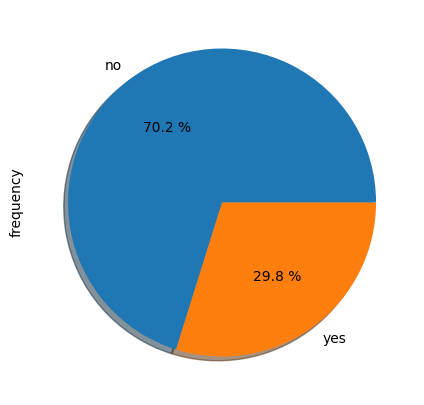

In [64]:
table5 = freq_tbl(dataLimpio['99_does_the_micro_retailer_exhibits_products_outside_'])
Filtro = table5[table5['frequency']>5]
Filtro_setter = Filtro.set_index("99_does_the_micro_retailer_exhibits_products_outside_")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.6 Columna 102_does_the_micro_retailer_sells_fresh_products_

<Axes: ylabel='frequency'>

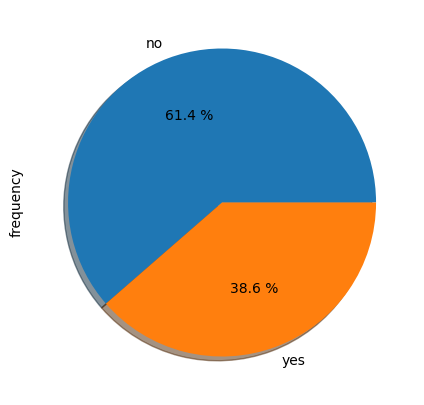

In [65]:
table6 = freq_tbl(dataLimpio['102_does_the_micro_retailer_sells_fresh_products_'])
Filtro = table6[table6['frequency']>5]
Filtro_setter = Filtro.set_index("102_does_the_micro_retailer_sells_fresh_products_")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.7 Columna 97_number_of_customers_in_store

<Axes: ylabel='frequency'>

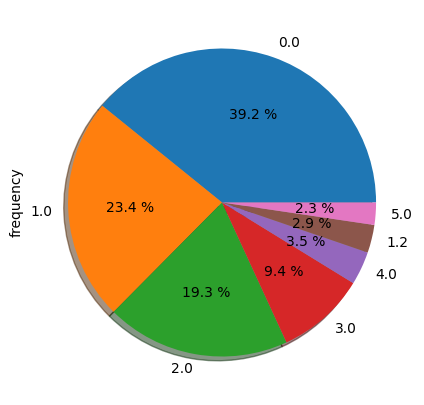

In [66]:
table7 = freq_tbl(dataLimpio['97_number_of_customers_in_store'].astype("string"))
Filtro = table7[table7['frequency']>2]
Filtro_setter = Filtro.set_index("97_number_of_customers_in_store")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.8 Columna 268_number_fridges

<Axes: ylabel='frequency'>

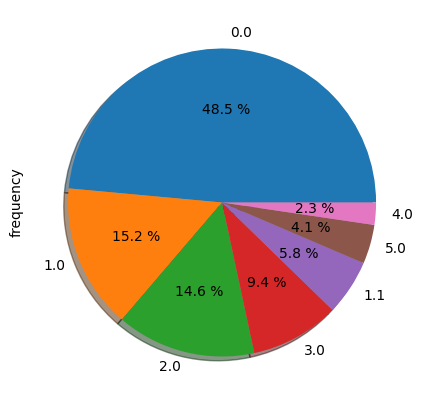

In [67]:
table8 = freq_tbl(dataLimpio['268_number_fridges'].astype("string"))
Filtro = table8[table8['frequency'] > 0]
Filtro_setter = Filtro.set_index("268_number_fridges")

# Crear un gráfico de pastel directamente desde la columna 'frequency'
Filtro_setter["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")


- 4.9 Columna 104_how_many_shelves_does_the_micro_retailer_have

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

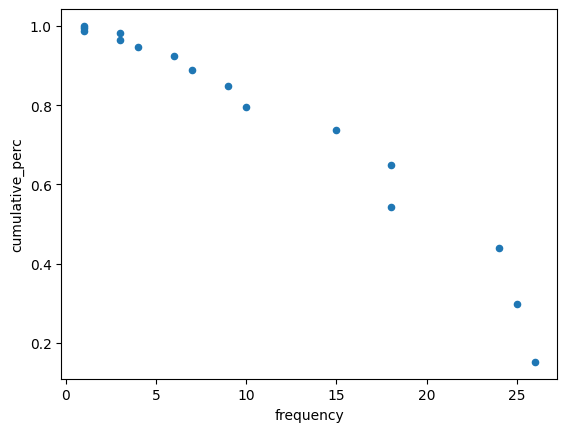

In [68]:
table9 = freq_tbl(dataLimpio['104_how_many_shelves_does_the_micro_retailer_have'].astype("string"))
Filtro = table9[table9['frequency'] > 0]
Filtro_setter = Filtro.set_index("104_how_many_shelves_does_the_micro_retailer_have")

#Realizamos grafico de dispersion del datafrae filtrado
Filtro_setter.plot("frequency", "cumulative_perc", kind = "scatter")

- 4.10 Columna 2_current_permanent_employees

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

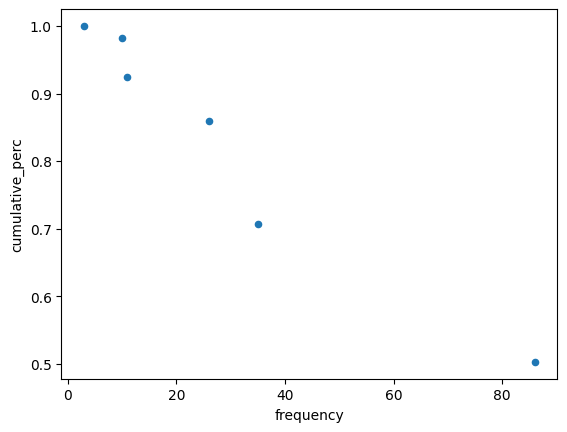

In [69]:
table10 = freq_tbl(dataLimpio['2_current_permanent_employees'].astype("string"))
Filtro = table10[table10['frequency'] > 0]
Filtro_setter = Filtro.set_index("2_current_permanent_employees")

#Realizamos grafico de dispersion del datafrae filtrado
Filtro_setter.plot("frequency", "cumulative_perc", kind = "scatter")

- 4.11 Columna4_number_permanent_employees_last_year

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

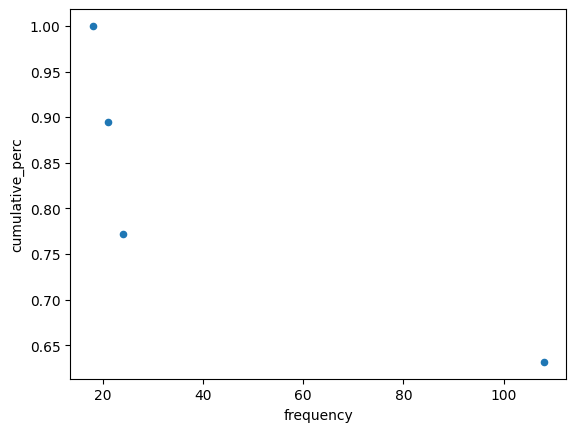

In [70]:
table11 = freq_tbl(dataLimpio['4_number_permanent_employees_last_year'].astype("string"))
Filtro = table11[table11['frequency'] > 0]
Filtro_setter = Filtro.set_index("4_number_permanent_employees_last_year")

#Realizamos grafico de dispersion del datafrae filtrado
Filtro_setter.plot("frequency", "cumulative_perc", kind = "scatter")

- 4.12 Columna 20_reviews_finances_monthly

<Axes: ylabel='frequency'>

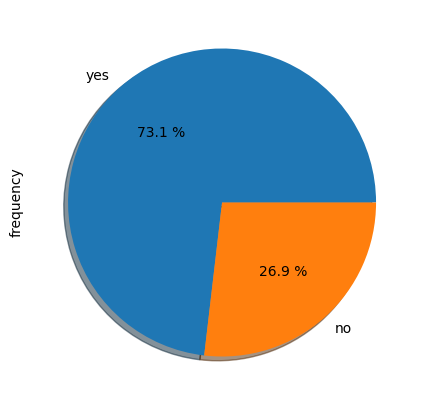

In [71]:
table12 = freq_tbl(dataLimpio['20_reviews_finances_monthly'].astype("string"))
Filtro = table12[table12['frequency'] > 0]
Filtro_setter = Filtro.set_index("20_reviews_finances_monthly")

# Crear un gráfico de pastel directamente desde la columna 'frequency'
Filtro_setter["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")

- 4.13 Columna 49_inventory_records

<Axes: ylabel='frequency'>

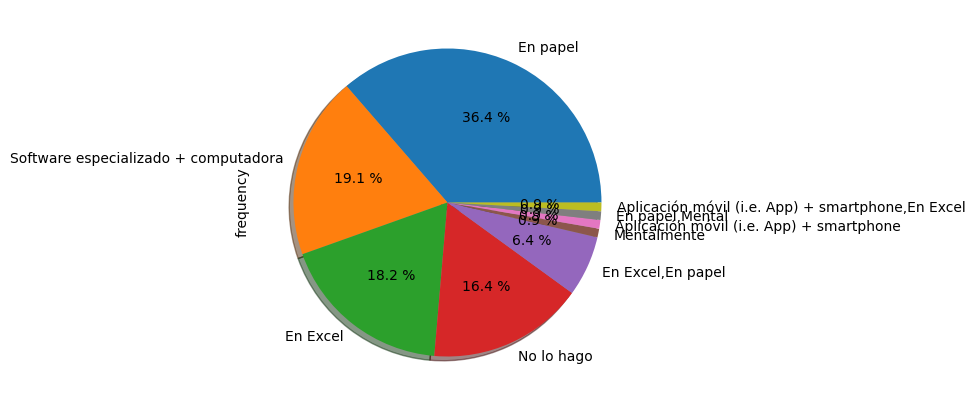

In [72]:
table13 = freq_tbl(dataLimpio['49_inventory_records'].astype("string"))
Filtro = table13[table13['frequency'] > 0]
Filtro_setter = Filtro.set_index("49_inventory_records")

# Crear un gráfico de pastel directamente desde la columna 'frequency'
Filtro_setter["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")

- 4.14 Columna 145_number_direct_competitors

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

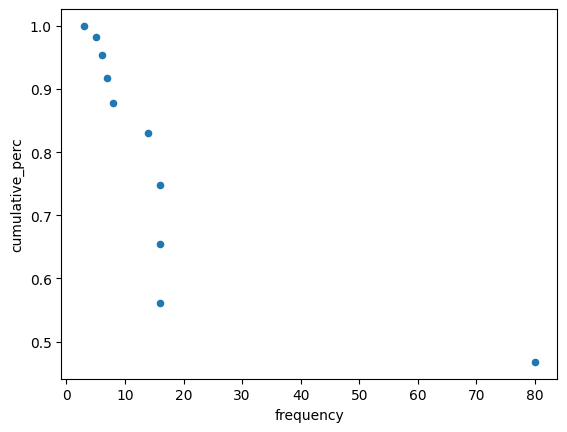

In [73]:
table14 = freq_tbl(dataLimpio['145_number_direct_competitors'].astype("string"))
Filtro = table14[table14['frequency'] > 0]
Filtro_setter = Filtro.set_index("145_number_direct_competitors")

#Realizamos grafico de dispersion del datafrae filtrado
Filtro_setter.plot("frequency", "cumulative_perc", kind = "scatter")

- 4.15 Columna 186_internet_connection

<Axes: ylabel='frequency'>

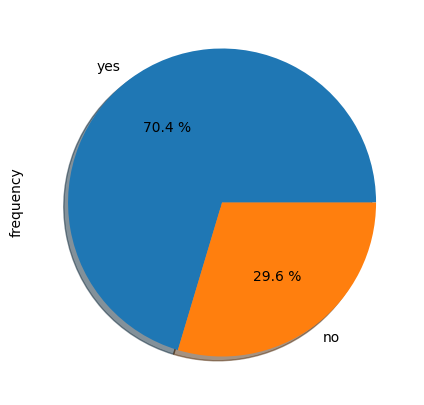

In [74]:
table15 = freq_tbl(dataLimpio['186_internet_connection'])
Filtro = table15[table15['frequency']>5]
Filtro_setter = Filtro.set_index("186_internet_connection")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.16 Columna 214_customer_relationship_tools

<Axes: ylabel='frequency'>

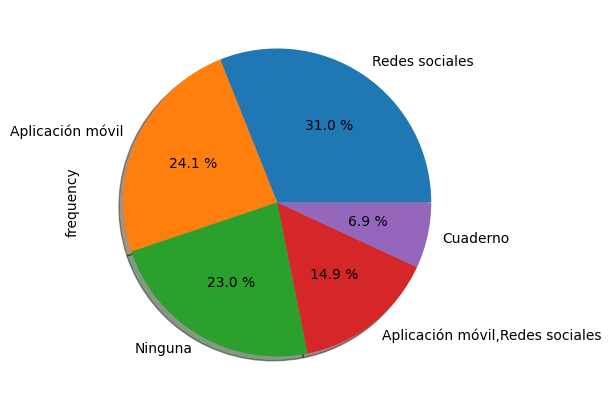

In [75]:
table16 = freq_tbl(dataLimpio['214_customer_relationship_tools'])
Filtro = table16[table16['frequency']>5]
Filtro_setter = Filtro.set_index("214_customer_relationship_tools")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.17 Columna 33_credit_to_customers

<Axes: ylabel='frequency'>

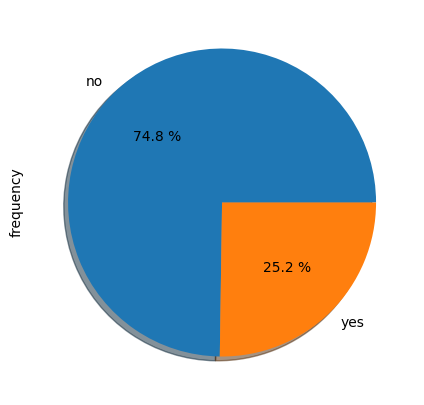

In [76]:
table17 = freq_tbl(dataLimpio['33_credit_to_customers'])
Filtro = table17[table17['frequency']>5]
Filtro_setter = Filtro.set_index("33_credit_to_customers")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.18 Columna 227_agreement_ecommerce_platforms

<Axes: ylabel='frequency'>

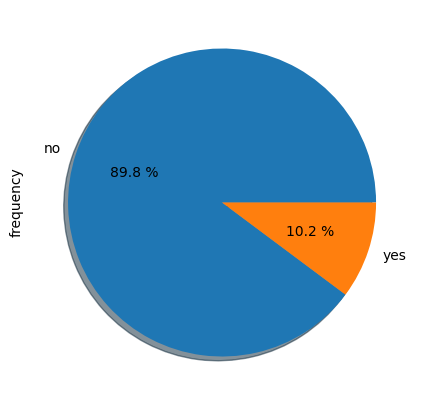

In [77]:
table18 = freq_tbl(dataLimpio['227_agreement_ecommerce_platforms'])
Filtro = table18[table18['frequency']>5]
Filtro_setter = Filtro.set_index("227_agreement_ecommerce_platforms")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.19 Columna 60_services

<Axes: ylabel='frequency'>

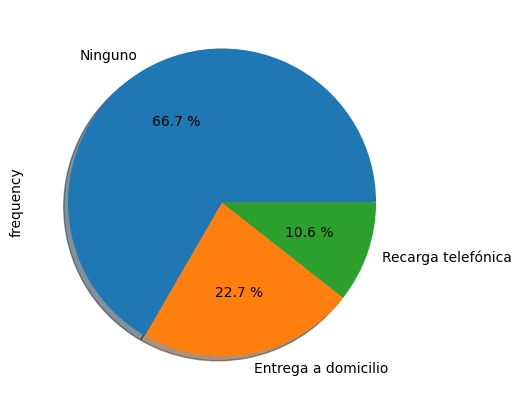

In [78]:
table19 = freq_tbl(dataLimpio['60_services'])
Filtro = table19[table19['frequency']>5]
Filtro_setter = Filtro.set_index("60_services")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

- 4.20 Columna 277_payment_method_suppliers

<Axes: ylabel='frequency'>

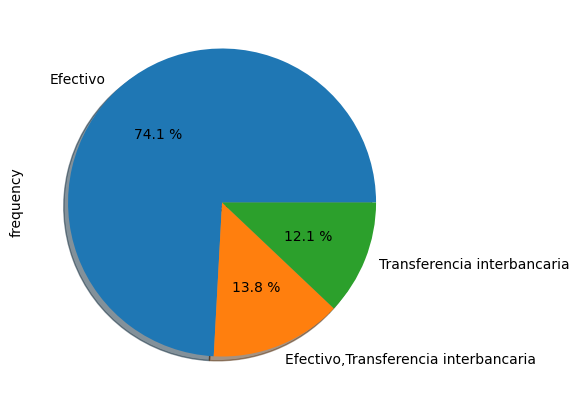

In [79]:
table20 = freq_tbl(dataLimpio['277_payment_method_suppliers'])
Filtro = table20[table20['frequency']>5]
Filtro_setter = Filtro.set_index("277_payment_method_suppliers")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")